1b: write code (with AI assistant) to build a naive Bayes and KNN classifier. You can
use the hamspam.csv to test it out.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("hamspam.csv")  # Ensure the file path is correct

# Encode categorical variables
le = LabelEncoder()
for col in ["Contains Link", "Contains Money Words", "Length", "Class"]:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df[["Contains Link", "Contains Money Words", "Length"]]
y = df["Class"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Train KNN model (K=2)
knn_model = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn_model.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=2)

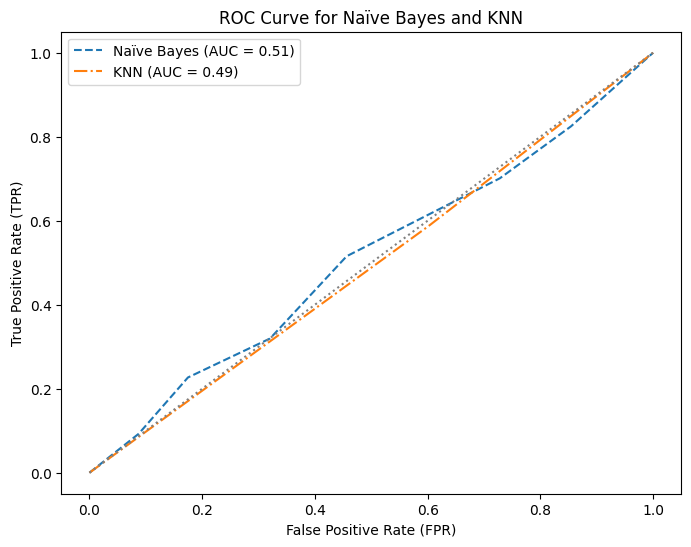

Naïve Bayes AUC: 0.51
KNN AUC: 0.49


In [5]:
# Get probability scores
nb_probs = nb_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f"Naïve Bayes (AUC = {nb_auc:.2f})", linestyle='--')
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.2f})", linestyle='-.')
plt.plot([0, 1], [0, 1], color="gray", linestyle=":")  # Random guess line

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Naïve Bayes and KNN")
plt.legend()
plt.show()

print(f"Naïve Bayes AUC: {nb_auc:.2f}")
print(f"KNN AUC: {knn_auc:.2f}")


Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or
Decision tree); using the hamspam.csv, ask to output an ROC curve and AUC score. (Hint: if
you fit a decision tree, you might want to reduce max_depth)

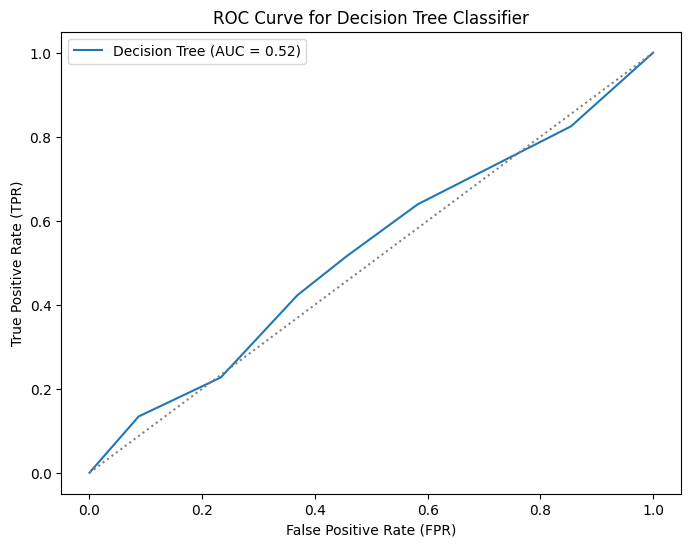

Decision Tree AUC: 0.52


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv("hamspam.csv")  # Ensure the file path is correct

# Encode categorical variables
le = LabelEncoder()
for col in ["Contains Link", "Contains Money Words", "Length", "Class"]:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df[["Contains Link", "Contains Money Words", "Length"]]
y = df["Class"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model with limited depth
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Get probability scores
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = auc(dt_fpr, dt_tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})", linestyle='-')
plt.plot([0, 1], [0, 1], color="gray", linestyle=":")  # Random guess line

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.show()

print(f"Decision Tree AUC: {dt_auc:.2f}")
